In [ ]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

### Functions

In [ ]:
def carrier_operation_codes(df_col):
    carrier_dict = {'A': 'Interstate', 'B': 'Intrastate Hazmat', 'C': 'Intrastate Non-Hazmat'}
    df_col = df_col.replace(carrier_dict)
    return df_col

def vmt_source_id_codes(df_col):
    vmt_dict = {1.0: 'Census', 2.0: 'Safety Audit', 3.0: 'Investigation'}
    df_col = df_col.replace(vmt_dict)
    return df_col

def cons_operation_category(df):
    carrier_operation_columns = ['PRIVATE_ONLY', 'AUTHORIZED_FOR_HIRE', 'EXEMPT_FOR_HIRE', 'PRIVATE_PROPERTY', 'PRIVATE_PASSENGER_BUSINESS', 'PRIVATE_PASSENGER_NONBUSINESS', 
                                 'MIGRANT', 'US_MAIL', 'FEDERAL_GOVERNMENT', 'STATE_GOVERNMENT', 'LOCAL_GOVERNMENT', 'INDIAN_TRIBE']
    df['CARRIER_OPERATION_LIST'] = df[carrier_operation_columns + ['OP_OTHER']].apply(
        lambda x: ';'.join(x.index[x != 'N']) + (';OP_OTHER: ' + str(x['OP_OTHER']) if x['OP_OTHER'] != 'N' else ''), axis = 1)
    return df

#### Functions to change state and country abbreviations to full names.

In [112]:
def state_abb_to_full(df_col):
    state_prov_dict = {
        'AL': 'Alabama',
        'AK': 'Alaska',
        'AR': 'Arkansas', 
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut', 
        'DC': 'District of Columbia', 
        'DE': 'Delaware', 
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa', 
        'ID': 'Idaho',
        'IL': 'Illinois', 
        'IN': 'Indiana', 
        'KS': 'Kansas', 
        'KY': 'Kentucky',
        'LA': 'Louisiana', 
        'MA': 'Massachussetts', 
        'MD': 'Maryland', 
        'ME': 'Maine',
        'MI': 'Michigan', 
        'MN': 'Minnesota',
        'MO': 'Missouri', 
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina', 
        'ND': 'North Dakota',
        'NE': 'Nebraska', 
        'NH': 'New Hampshire', 
        'NJ': 'New Jersey', 
        'NM': 'New Mexico', 
        'NV': 'Nevada', 
        'NY': 'New York', 
        'OH': 'Ohio', 
        'OK': 'Oklahoma',
        'OR': 'Oregon', 
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island', 
        'SC': 'South Carolina',  
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas', 
        'UT': 'Utah',
        'VA': 'Virginia', 
        'VT': 'Vermont', 
        'WA': 'Washington', 
        'WI': 'Wisconsin',
        'WV': 'West Virginia', 
        'WY': 'Wyoming', 
        
        # Canadian Provinces
        'AB': 'Alberta', 
        'BC': 'British Columbia',
        'MB': 'Manitoba',
        'NB': 'New Brunswick', 
        'NF': 'Newfoundland',
        'NS': 'Nova Scotia',
        'NT': 'Northwest Territories', 
        'ON': 'Ontario', 
        'PE': 'Prince Edward Island',
        'QC': 'Quebec',
        'SK': 'Saskatchewan', 
        'YT': 'Yukon Territory', 
        
        # Mexico States
        'AG': 'Aguascalientes', 
        'BN': 'Baja California Norte',
        'BS': 'Baja California Sur',
        'CH': 'Coahuila',
        'CI': 'Chihuahua',
        'CL': 'Colima',
        'CP': 'Campeche', 
        'CS': 'Chiapas', 
        'DF': 'Districto Federal', 
        'DG': 'Durango', 
        'GE': 'Guerrero', 
        'GJ': 'Guanajuato',
        'HD': 'Hidalgo',
        'JA': 'Jalisco',  
        'MC': 'Michoacan',
        'MR': 'Morelos',
        'MX': 'Mexico',
        'NA': 'Nayarit',
        'NL': 'Nuevo Leon',
        'OA': 'Oaxaca',
        'PU': 'Puebla', 
        'QE': 'Queretaro', 
        'QI': 'Quintana Roo', 
        'SI': 'Sinaloa',
        'SL': 'San Luis Potosi',
        'SO': 'Sonora',
        'TA': 'Tamaulipas',
        'TB': 'Tabasco',
        'TL': 'Tlaxcala',
        'VC': 'Veracruz',
        'YU': 'Yucatan',
        'ZA': 'Zacatecas',  

        # Central American Countries
        'BZ': 'Belize',  
        'CR': 'Costa Rica', 
        'CZ': 'Canal Zone',
        'SV': 'El Salvador',
        'GT': 'Guatemala',
        'HN': 'Honduras', 
        'NI': 'Nicaragua', 
         
        # American Possessions or Protecectorates
        'AS': 'American Samoa',
        'GU': 'Guam', 
        'MP': 'Northern Marianas', 
        'PR': 'Puerto Rico',
        'VI': 'Virgin Islands',

        # Unknowns
        'DO': 'DO', 
        'FJ': 'FJ',
        'GB': 'GB', 
        'KW': 'KW',
        'OT': 'Other',
        'UK': 'NaN',
        'ZZ': 'NaN',
    }

    df_col = df_col.replace(state_prov_dict)
    return df_col
        
def country_abb_to_full(df_col):
    country_dict = {
        'US': 'United States',
        'MX': 'Mexico',
        'CA': 'Canada',
        'SV': 'El Salvador',
        'GT': 'Guatemala', 
        'BZ': 'Belize',
        'NI': 'Nicaragua',
        'CR': 'Costa Rica',
        'HN': 'Honduras',
        'GB': 'GB', 
        'KW': 'KW', 
        'DO': 'DO', 
        'IN': 'IN', 
        'FJ': 'FJ'
    }

    df_col = df_col.replace(country_dict)
    return df_col

### Main

In [ ]:
tfr = pd.read_csv('FMCSA_CENSUS1_2025Feb.txt', sep = ',', encoding = 'windows-1252', iterator = True, chunksize = 100000)   
df = pd.concat(tfr, ignore_index = True)

In [186]:
df['CARRIER_OPERATION'] = carrier_operation_codes(df['CARRIER_OPERATION'])
df['VMT_SOURCE_ID'] = vmt_source_id_codes(df['VMT_SOURCE_ID'])
df['PHY_STATE'], df['MAILING_STATE'], df['OIC_STATE'] = state_abb_to_full(df['PHY_STATE']), state_abb_to_full(df['MAILING_STATE']), state_abb_to_full(df['OIC_STATE'])
df['PHY_COUNTRY'], df['MAILING_COUNTRY'] = country_abb_to_full(df['PHY_COUNTRY']), country_abb_to_full(df['MAILING_COUNTRY'])

df = cons_operation_category(df)

print(display(df))

,DOT_NUMBER,LEGAL_NAME,DBA_NAME,CARRIER_OPERATION,HM_FLAG,PC_FLAG,PHY_STREET,PHY_CITY,PHY_STATE,PHY_ZIP,...,PRIVATE_PASSENGER_BUSINESS,PRIVATE_PASSENGER_NONBUSINESS,MIGRANT,US_MAIL,FEDERAL_GOVERNMENT,STATE_GOVERNMENT,LOCAL_GOVERNMENT,INDIAN_TRIBE,OP_OTHER,CARRIER_OPERATION_LIST
0,1,FEDERAL MOTOR CARRIER SAFETY ADMINISTRATION,FMCSA TECHNOLOGY DIVISION,Interstate,N,N,1200 NEW JERSEY AVENUE SE,WASHINGTON,District of Columbia,20590,...,N,N,N,N,Y,N,N,N,AUTOMATED VEHICLE RESEARCH & TESTING,FEDERAL_GOVERNMENT;OP_OTHER;OP_OTHER: AUTOMATE...
1,10000,POWELL DISTRIBUTING CO INC,NaN,Interstate,N,N,9125 N BURRAGE,PORTLAND,Oregon,97217,...,N,N,N,N,N,N,N,N,N,PRIVATE_ONLY;PRIVATE_PROPERTY
2,1000000,JAMES EARL KILLINGSWORTH JR,JAMES KILLINGSWORTH TRUCKING,Interstate,N,N,15 GASLINE ROAD,PHENIX CITY,Alabama,36870,...,N,N,N,N,N,N,N,N,N,AUTHORIZED_FOR_HIRE
3,1000002,NEW JERSEY BOOM & ERECTORS INC,NaN,Interstate,N,N,405 INDUSTRIAL PARK DRIVE,MOUNT POCONO,Pennsylvania,18344,...,N,N,N,N,N,N,N,N,N,PRIVATE_ONLY;PRIVATE_PROPERTY
4,1000004,RAY TRUCKING LLC,NaN,Intrastate Non-Hazmat,N,N,218 PEACHTREE ST,WARWICK,Georgia,31796,...,N,N,N,N,N,N,N,N,COTTON,AUTHORIZED_FOR_HIRE;OP_OTHER;OP_OTHER: COTTON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066381,999989,THOMAS C BORCHERT,NaN,Intrastate Non-Hazmat,N,N,W12026 LANGE ROAD,COLUMBUS,Wisconsin,53925,...,N,N,N,N,N,N,N,N,APPLYING FOR MC,OP_OTHER;OP_OTHER: APPLYING FOR MC
2066382,999990,COPPERHEAD ROAD TRANSPORT LLC,NaN,Interstate,N,N,1069 MINNIE HILL RD,CHILLICOTHE,Ohio,45601,...,N,N,N,N,N,N,N,N,N,AUTHORIZED_FOR_HIRE
2066383,999993,BOB'S DIGGING & LANDSCAPING INC,NaN,Intrastate Non-Hazmat,N,N,W11954 VAN NESS ROAD,LODI,Wisconsin,53555,...,N,N,N,N,N,N,N,N,N,AUTHORIZED_FOR_HIRE
2066384,999994,BADGER DISPOSAL INC,NaN,Intrastate Non-Hazmat,N,N,150 E SCHOOL STREET,COLUMBUS,Wisconsin,53925,...,N,N,N,N,N,N,N,N,N,PRIVATE_ONLY;PRIVATE_PROPERTY


None


In [188]:
df_general = df[['DOT_NUMBER', 'LEGAL_NAME', 'DBA_NAME', 'CARRIER_OPERATION', 'ADD_DATE', 'OIC_STATE', 'NBR_POWER_UNIT', 'DRIVER_TOTAL']]
df_phy_address = df[['DOT_NUMBER', 'PHY_STREET', 'PHY_CITY', 'PHY_STATE', 'PHY_ZIP', 'PHY_COUNTRY']]
df_mailing_address = df[['DOT_NUMBER', 'MAILING_STREET', 'MAILING_CITY', 'MAILING_STATE', 'MAILING_ZIP', 'MAILING_COUNTRY']]
df_contact = df[['DOT_NUMBER', 'TELEPHONE', 'EMAIL_ADDRESS']]
df_mcs150 = df[['DOT_NUMBER', 'MCS150_DATE', 'MCS150_MILEAGE', 'MCS150_MILEAGE_YEAR']]
df_vmt = df[['DOT_NUMBER', 'RECENT_MILEAGE', 'RECENT_MILEAGE_YEAR', 'VMT_SOURCE_ID']]
df_carrier_class = df[['DOT_NUMBER', 'CARRIER_OPERATION_LIST', 'PRIVATE_ONLY', 'AUTHORIZED_FOR_HIRE', 'EXEMPT_FOR_HIRE', 'PRIVATE_PROPERTY', 'PRIVATE_PASSENGER_BUSINESS',
                      'PRIVATE_PASSENGER_NONBUSINESS', 'MIGRANT', 'US_MAIL', 'FEDERAL_GOVERNMENT', 'STATE_GOVERNMENT', 'LOCAL_GOVERNMENT', 'INDIAN_TRIBE', 'OP_OTHER']]

print(display(df_general.head(50)))

,DOT_NUMBER,LEGAL_NAME,DBA_NAME,CARRIER_OPERATION,ADD_DATE,OIC_STATE,NBR_POWER_UNIT,DRIVER_TOTAL
0,1,FEDERAL MOTOR CARRIER SAFETY ADMINISTRATION,FMCSA TECHNOLOGY DIVISION,Interstate,01-JUN-74,District of Columbia,4.0,3.0
1,10000,POWELL DISTRIBUTING CO INC,NaN,Interstate,01-JUN-74,Oregon,1.0,1.0
2,1000000,JAMES EARL KILLINGSWORTH JR,JAMES KILLINGSWORTH TRUCKING,Interstate,23-JAN-02,Alabama,2.0,1.0
3,1000002,NEW JERSEY BOOM & ERECTORS INC,NaN,Interstate,22-JAN-02,Pennsylvania,1.0,1.0
4,1000004,RAY TRUCKING LLC,NaN,Intrastate Non-Hazmat,22-JAN-02,Georgia,2.0,1.0
5,1000008,GUERRERA LANDSCAPING LLC,NaN,Intrastate Non-Hazmat,22-JAN-02,Connecticut,4.0,3.0
6,1000012,CENTRAL HEATING & AIR INC,NaN,Intrastate Non-Hazmat,22-JAN-02,South Dakota,24.0,24.0
7,1000013,ST LOUIS PARK TRANSPORTATION INC,PARK ADAM TRANSPORTATION,Intrastate Non-Hazmat,22-JAN-02,Minnesota,58.0,58.0
8,1000014,HACKWELL TRUCKING LLC,NaN,Intrastate Non-Hazmat,22-JAN-02,Colorado,1.0,1.0
9,1000015,DAREN STONE,NaN,Intrastate Non-Hazmat,22-JAN-02,Colorado,1.0,1.0


None


### Matplot and Pandas Dataframe
Heatmap of the United States based on the total FMCSA US records. Data is based on the PHY_STATE field in the dataset.

In [ ]:
seaborn_df = df_general.merge(df_phy_address, on = 'DOT_NUMBER', how = 'inner')
seaborn_df = seaborn_df.dropna(subset = ['PHY_STATE'])
seaborn_df = seaborn_df[seaborn_df['PHY_COUNTRY'] == 'United States']
seaborn_df = seaborn_df[~seaborn_df['PHY_STATE'].isin(['Puerto Rico', 'Virgin Islands', 'Northern Marianas', 'Guam', 'American Samoa'])] # Removes rows with the following values.
seaborn_df = seaborn_df.sort_values(by = 'PHY_STATE')

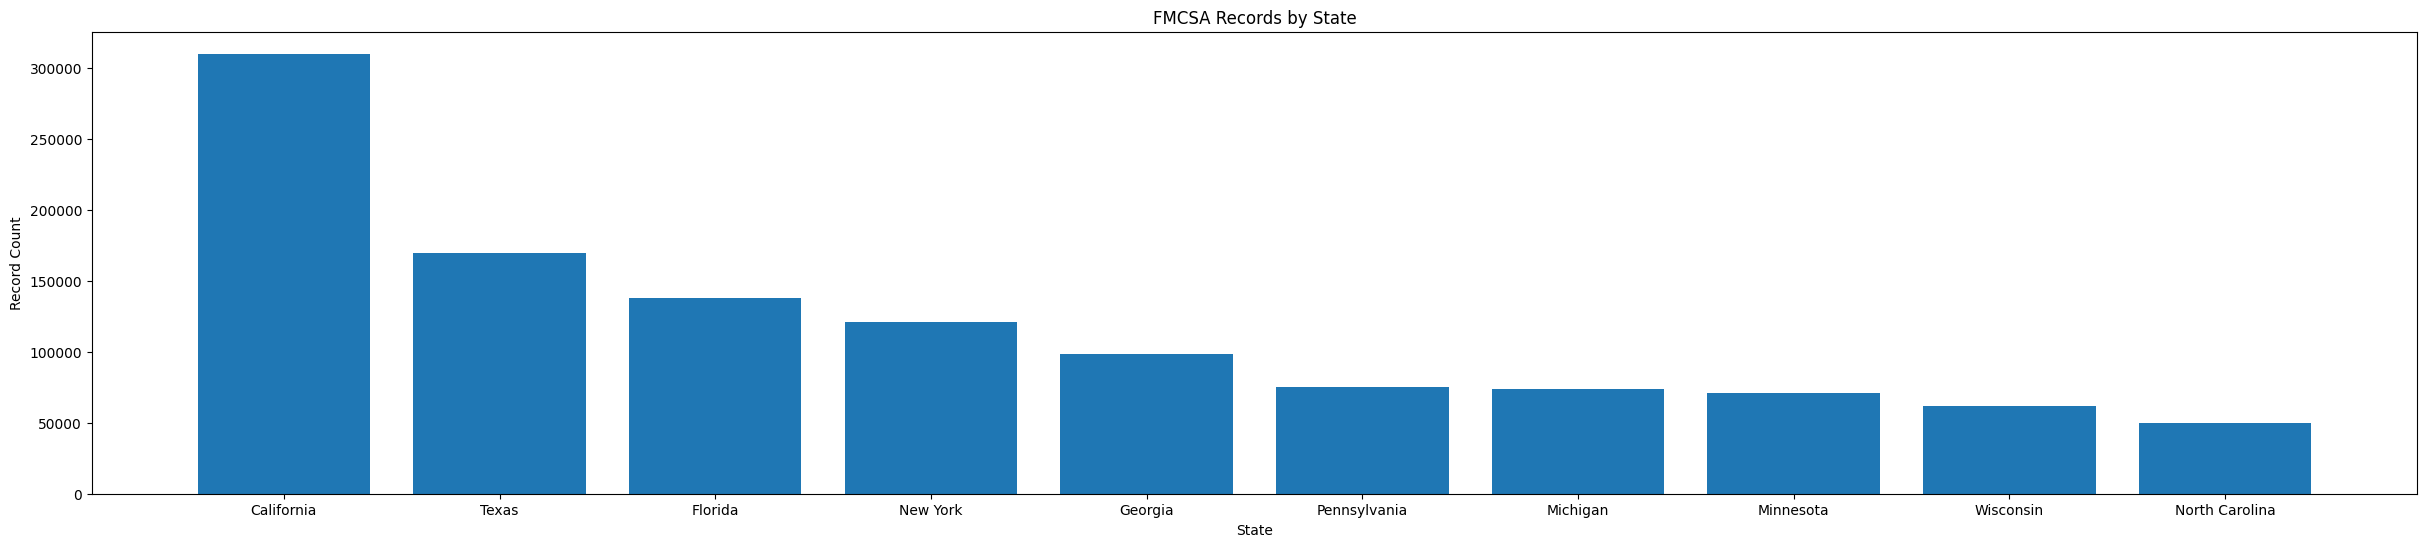

In [331]:
data = {
    'state': list(seaborn_df['PHY_STATE'].unique()),
    'record_count': [seaborn_df[seaborn_df['PHY_STATE'] == count].shape[0] for count in seaborn_df['PHY_STATE'].unique()]}
data_df = pd.DataFrame(data)
data_df = data_df.nlargest(10, 'record_count')

plt.bar(data_df['state'], data_df['record_count'])
plt.title('FMCSA Records by State')
plt.xlabel('State')
plt.ylabel('Record Count')
plt.rcParams['figure.figsize'] = (20, 6)
plt.show()
